In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import train_test_split
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

https://stackoverflow.com/questions/70222381/gaussian-confidence-interval-python

In [9]:
X = np.linspace(start=0, stop=10, num=1_000).reshape(-1, 1)
y = np.squeeze(X * np.sin(X))
rng = np.random.RandomState(1)

training_indices = rng.choice(np.arange(y.size), size=6, replace=False)
test_indices = [x for x in np.arange(y.size) if x not in training_indices]

x_train, y_train = X[training_indices], y[training_indices]
x_test, y_test = X[test_indices], y[test_indices]

In [33]:
kernel = C(1.0, (1e-3, 1e3))*RBF(1.0, (1e-2, 1e2))
gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=25, alpha=0.1, normalize_y=True)
gpr.fit(x_train, y_train)
y_prediction, std = gpr.predict(x_test, return_std=True)

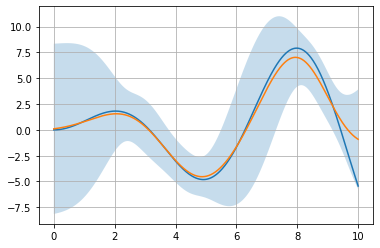

In [37]:
fig, axe = plt.subplots()
axe.plot(X, y)
axe.plot(x_test, y_prediction)
axe.fill_between(
    x_test.ravel(),
    y_prediction - 1.96 * std,
    y_prediction + 1.96 * std,
    alpha=0.25,
)
axe.grid()